In [109]:
import pandas as pd

In [130]:
cr=pd.read_csv("E:/datasets/CreditRisk.csv")

In [131]:
cr.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0.0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1.0,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0.0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0.0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0.0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [132]:
cr.isnull().sum()

Loan_ID               0
Gender               24
Married               3
Dependents           25
Education             0
Self_Employed        55
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           27
Loan_Amount_Term     20
Credit_History       79
Property_Area         0
Loan_Status           0
dtype: int64

In [133]:
cr=cr.iloc[:,[1,2,3,4,5,6,7,8,9,10,11,12]]

In [134]:
cr.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0.0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1.0,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0.0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0.0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0.0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [135]:
cr.describe(include="all")

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
count,957,978,956.000000,981,926,981.000000,981.000000,954.000000,961.000000,902.000000,981,981
unique,2,2,NaN,2,2,NaN,NaN,NaN,NaN,NaN,3,2
top,Male,Yes,NaN,Graduate,No,NaN,NaN,NaN,NaN,NaN,Semiurban,Y
freq,775,631,NaN,763,807,NaN,NaN,NaN,NaN,NaN,349,712
mean,NaN,NaN,0.881799,NaN,NaN,5179.795107,1601.916330,142.511530,342.201873,0.835920,NaN,NaN
std,NaN,NaN,1.255623,NaN,NaN,5695.104533,2718.772806,77.421743,65.100602,0.370553,NaN,NaN
min,NaN,NaN,0.000000,NaN,NaN,0.000000,0.000000,9.000000,6.000000,0.000000,NaN,NaN
25%,NaN,NaN,0.000000,NaN,NaN,2875.000000,0.000000,100.000000,360.000000,1.000000,NaN,NaN
50%,NaN,NaN,0.000000,NaN,NaN,3800.000000,1110.000000,126.000000,360.000000,1.000000,NaN,NaN
75%,NaN,NaN,2.000000,NaN,NaN,5516.000000,2365.000000,162.000000,360.000000,1.000000,NaN,NaN


In [136]:
cr.Gender=cr.Gender.fillna("Male")
cr.Married=cr.Married.fillna("Yes")
cr.Dependents=cr.Dependents.fillna(cr.Dependents.median())
cr.Self_Employed=cr.Self_Employed.fillna("No")
cr.LoanAmount=cr.LoanAmount.fillna(cr.LoanAmount.mean())
cr.Loan_Amount_Term=cr.Loan_Amount_Term.fillna(cr.Loan_Amount_Term.median())
cr.Credit_History=cr.Credit_History.fillna(cr.Credit_History.median())

In [137]:
cr.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [138]:
cr.Gender.replace({"Male": 1, "Female": 0}, inplace = True)
cr.Married.replace({"No": 0, "Yes": 1}, inplace = True)
cr.Education.replace({"Graduate" : 1, "Not Graduate": 0}, inplace = True)
cr.Self_Employed.replace({"No": 0, "Yes": 1}, inplace = True)
cr.Property_Area.replace({"Semiurban": 1, "Urban": 2, "Rural": 3}, inplace = True)
cr.Loan_Status.replace({"Y": 1, "N": 0}, inplace = True)



In [139]:
from sklearn.model_selection import train_test_split

In [140]:
cr_train,cr_test=train_test_split(cr,test_size=0.2,random_state=555)

In [156]:
cr_train_x=cr_train.iloc[:,0:-1]
cr_train_y=cr_train.iloc[:,-1]
cr_test_x=cr_test.iloc[:,0:-1]
cr_test_y=cr_test.iloc[:,-1]

In [157]:
from sklearn.linear_model import LogisticRegression
lg=LogisticRegression()

In [158]:
lg.fit(cr_train_x,cr_train_y)


LogisticRegression()

In [159]:
pred_test=lg.predict(cr_test_x)

In [164]:
from sklearn.metrics import confusion_matrix

tab1 = confusion_matrix(pred_test, cr_test_y)
tab1



array([[ 29,   2],
       [ 32, 134]], dtype=int64)

In [165]:
tab1.diagonal()

array([ 29, 134], dtype=int64)

In [166]:
tab1.diagonal().sum()

163

In [168]:

accuracy=tab1.diagonal().sum()/tab1.sum()*100
accuracy

82.74111675126903

In [169]:
Tpr=tab1[1][1]/(tab1[1][1]+tab1[0][1])
Tpr

0.9852941176470589

In [174]:
from sklearn.metrics import accuracy_score
accuracy_score(cr_test_y,pred_test)

0.8274111675126904

In [175]:
from sklearn.metrics import precision_score
precision_score(cr_test_y,pred_test)

0.8072289156626506

In [176]:
precision_score(pred_test,cr_test_y)

0.9852941176470589

In [177]:
lg.coef_f_

array([[ 1.33387710e-01,  4.98041626e-01,  1.84865645e-02,
         5.85513679e-01,  1.11292120e-01,  2.52175603e-05,
        -5.11653834e-05, -3.86722478e-03, -3.96472338e-03,
         3.80597224e+00, -6.65486374e-01]])

In [178]:
lg.intercept_

array([0.30098483])

In [179]:
lg.predict_proba(cr_test_x)  ##Prediction in probability for each record we get 2 value(Probability  fallin in class 0 & 1)

array([[0.12177294, 0.87822706],
       [0.09593909, 0.90406091],
       [0.15622672, 0.84377328],
       [0.94726593, 0.05273407],
       [0.45418606, 0.54581394],
       [0.08578398, 0.91421602],
       [0.89396674, 0.10603326],
       [0.03257467, 0.96742533],
       [0.07371967, 0.92628033],
       [0.81295028, 0.18704972],
       [0.05311426, 0.94688574],
       [0.0457981 , 0.9542019 ],
       [0.11610693, 0.88389307],
       [0.27568708, 0.72431292],
       [0.04769098, 0.95230902],
       [0.10483507, 0.89516493],
       [0.14221883, 0.85778117],
       [0.05237311, 0.94762689],
       [0.9601005 , 0.0398995 ],
       [0.22961438, 0.77038562],
       [0.16664213, 0.83335787],
       [0.10598448, 0.89401552],
       [0.1646778 , 0.8353222 ],
       [0.05662102, 0.94337898],
       [0.94307817, 0.05692183],
       [0.95019525, 0.04980475],
       [0.16439155, 0.83560845],
       [0.18815597, 0.81184403],
       [0.06851523, 0.93148477],
       [0.12020283, 0.87979717],
       [0.

In [180]:
pred_test

array([1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
      dtype=int64)

In [188]:
## Build plot AUROC
from sklearn.metrics import  roc_auc_score
from sklearn.metrics import  roc_curve


In [191]:
lg_auc_roc=roc_auc_score(cr_test_y,pred_test)
lg_auc_roc

0.7303519768563163

In [192]:
prob=lg.predict_proba(cr_test_x) 

In [193]:
prob[:,1]

array([0.87822706, 0.90406091, 0.84377328, 0.05273407, 0.54581394,
       0.91421602, 0.10603326, 0.96742533, 0.92628033, 0.18704972,
       0.94688574, 0.9542019 , 0.88389307, 0.72431292, 0.95230902,
       0.89516493, 0.85778117, 0.94762689, 0.0398995 , 0.77038562,
       0.83335787, 0.89401552, 0.8353222 , 0.94337898, 0.05692183,
       0.04980475, 0.83560845, 0.81184403, 0.93148477, 0.87979717,
       0.75831566, 0.91580709, 0.74783181, 0.95679508, 0.04839805,
       0.86536976, 0.9321077 , 0.70360611, 0.81161453, 0.89920711,
       0.61176697, 0.93659839, 0.92754741, 0.82772715, 0.92600534,
       0.82565363, 0.51401081, 0.13376964, 0.15734782, 0.59906022,
       0.89734089, 0.94264445, 0.94288404, 0.95783233, 0.84864217,
       0.05003223, 0.16104595, 0.87613002, 0.83321201, 0.03620513,
       0.68699634, 0.85045033, 0.9085964 , 0.87431353, 0.97765287,
       0.87534795, 0.70771773, 0.80704396, 0.9128067 , 0.26660794,
       0.27677514, 0.89909516, 0.70795554, 0.80494536, 0.25508

In [194]:
fpr,tpr,threshold=roc_curve(cr_test_y, prob[:,1])

In [195]:
fpr

array([0.        , 0.        , 0.01639344, 0.01639344, 0.03278689,
       0.03278689, 0.04918033, 0.04918033, 0.06557377, 0.06557377,
       0.09836066, 0.09836066, 0.1147541 , 0.1147541 , 0.13114754,
       0.13114754, 0.16393443, 0.16393443, 0.18032787, 0.18032787,
       0.19672131, 0.19672131, 0.21311475, 0.21311475, 0.2295082 ,
       0.2295082 , 0.24590164, 0.24590164, 0.26229508, 0.26229508,
       0.27868852, 0.27868852, 0.29508197, 0.29508197, 0.31147541,
       0.31147541, 0.32786885, 0.32786885, 0.36065574, 0.36065574,
       0.37704918, 0.37704918, 0.39344262, 0.39344262, 0.40983607,
       0.40983607, 0.42622951, 0.42622951, 0.50819672, 0.50819672,
       0.7704918 , 0.7704918 , 0.83606557, 0.83606557, 1.        ])

In [196]:
tpr

array([0.        , 0.00735294, 0.00735294, 0.02941176, 0.02941176,
       0.25      , 0.25      , 0.27941176, 0.27941176, 0.33088235,
       0.33088235, 0.38235294, 0.38235294, 0.38970588, 0.38970588,
       0.48529412, 0.48529412, 0.59558824, 0.59558824, 0.60294118,
       0.60294118, 0.625     , 0.625     , 0.67647059, 0.67647059,
       0.75735294, 0.75735294, 0.77941176, 0.77941176, 0.81617647,
       0.81617647, 0.84558824, 0.84558824, 0.85294118, 0.85294118,
       0.86764706, 0.86764706, 0.875     , 0.875     , 0.88235294,
       0.88235294, 0.93382353, 0.93382353, 0.94117647, 0.94117647,
       0.95588235, 0.95588235, 0.97058824, 0.97058824, 0.98529412,
       0.98529412, 0.99264706, 0.99264706, 1.        , 1.        ])

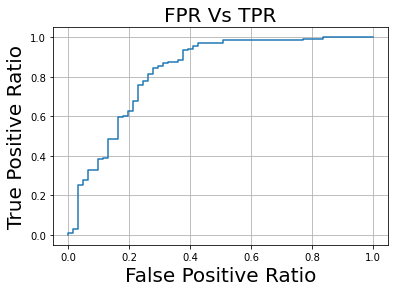

In [203]:
import matplotlib.pyplot as plt
plt.plot(fpr,tpr)
plt.xlabel("False Positive Ratio",size=20)
plt.ylabel("True Positive Ratio",size=20)
plt.title("FPR Vs TPR",size=20)
plt.grid()